## Chapter 03 - Tour of Machine Learning Classifiers using `scikit-learn`

Import **Iris** dataset

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

**Split** data into trailing and test data

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Standardize** the data

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**Perceptron**

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.01, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

**Predict** the values using the Perceptron

In [5]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: {}".format((y_test != y_pred).sum()))

Misclassified samples: 4


Check perceptron **accuracy**

In [6]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.91


New **plot_decision_regions**

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup markup generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    for idx, val in enumerate(np.unique(y)):
        plt.scatter(x=X[y==val,0], y=X[y==val, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=val)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

Plot decision regions for the Perceptron

In [8]:
X_combined_std = np.concatenate((X_train_std, X_test_std), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)
plt.figure(figsize=(8,6))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('sepal length [standardized]')
plt.legend(loc="upper left")
plt.show()

**Sigmoid function**

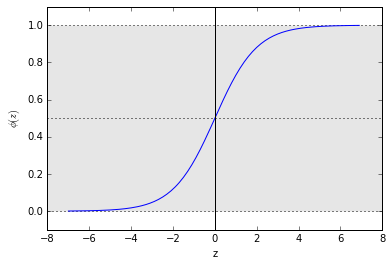

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1/(1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='0.9', alpha=1.0, linestyle='dotted')
plt.axhline(y=0.5, linestyle='dotted', color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

Training a _**Logistic Regression**_ model with _scikit-learn_

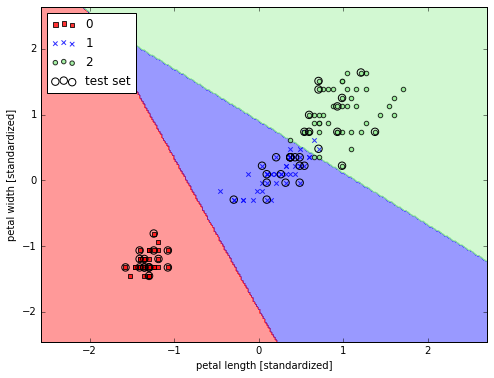

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)
plt.figure(figsize=(8,6))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc="upper left")
plt.show()

**Class membership probability**

In [11]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

Effect of **inverse regularization parameter C** on weights in Logistic Regression

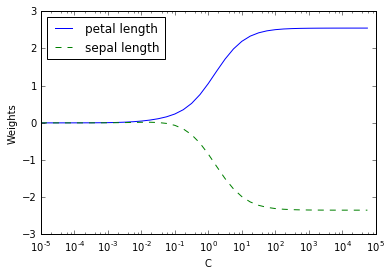

In [12]:
weights = []
c_vals = []

for c in np.arange(-5, 5, 0.25):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    class2_weights = lr.coef_[1]
    weights.append(class2_weights)
    c_vals.append(10**c)
    
weights = np.array(weights)
c_vals = np.array(c_vals)

plt.plot(c_vals, weights[:,0], label="petal length")
plt.plot(c_vals, weights[:,1], linestyle='--', label="sepal length")
plt.xlabel("C")
plt.xscale('log')
plt.ylabel("Weights")
plt.legend(loc="upper left")
plt.show()

**Support Vector Machines**

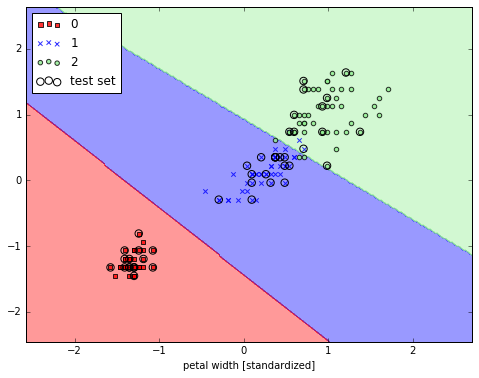

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8,6))
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Generating random dataset for studying _Kernelized SVM_

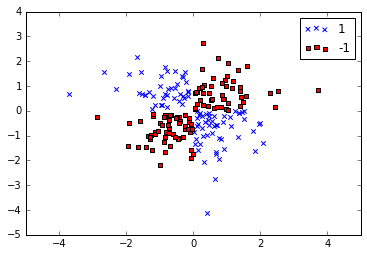

In [14]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.legend()
plt.show()

Using **Kernel SVM** on above data

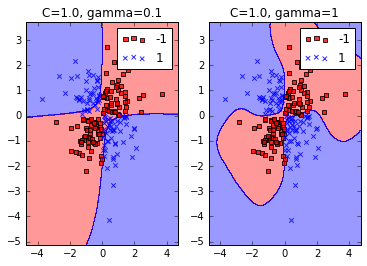

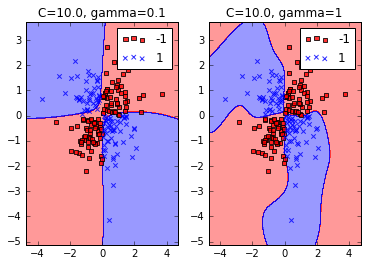

In [15]:
# plt.figure(1, figsize=(10,5))
plt.figure(1)
plt.subplot(121)
svm = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend()
plt.title("C=1.0, gamma=0.1")

plt.subplot(122)
svm = SVC(kernel='rbf', C=1.0, gamma=1.0, random_state=0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend()
plt.title("C=1.0, gamma=1")

# plt.figure(2, figsize=(10,5))
plt.figure(2)
plt.subplot(121)
svm = SVC(kernel='rbf', C=10.0, gamma=0.1, random_state=0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend()
plt.title("C=10.0, gamma=0.1")

plt.subplot(122)
svm = SVC(kernel='rbf', C=10.0, gamma=1, random_state=0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend()
plt.title("C=10.0, gamma=1")

plt.show()

**Decision Tree Learning**

Impurity Criteria: **_Gini_**

In [16]:
def gini(p):
    return (p)*(1-p) + (1-p)*(1-(1-p))

Impurity Criteria: **_Cross Entropy_**

In [17]:
def cross_entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

Impurity Criteria: **_Classification Error_**

In [18]:
def error(p):
    return 1 - np.max([p, 1-p])

**Plot impurity indices** for the probability range [0,1] for class 1

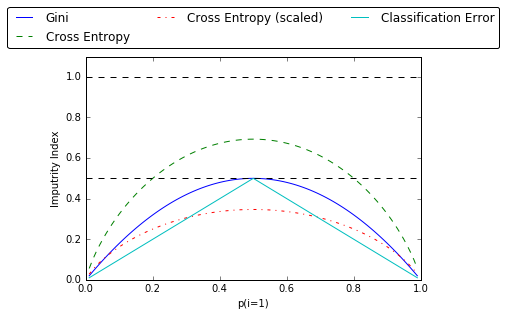

In [19]:
x = np.arange(0.01, 1, 0.01)

# gini
gin = [gini(p) for p in x]

# cross_entropy
ent = [cross_entropy(p) for p in x]
scaled_ent = [e*0.5 for e in ent]

# classification error
err = [error(p) for p in x]

ax = plt.subplot(111)
ax.plot(x, gin, label="Gini", linestyle="-")
ax.plot(x, ent, label="Cross Entropy", linestyle="--")
ax.plot(x, scaled_ent, label="Cross Entropy (scaled)", linestyle="-.")
ax.plot(x, err, label="Classification Error", linestyle='-')

ax.axhline(y=0.5, linestyle="--", color="k")
ax.axhline(y=1, linestyle="--", color="k")
ax.legend(loc="upper center", ncol=3, fancybox=True, bbox_to_anchor=(0.5, 1.25))

plt.ylim(ymax=1.1)
plt.xlabel("p(i=1)")
plt.ylabel("Imputrity Index")
plt.show()

**DecisionTreeClassifier** using scikit-learn

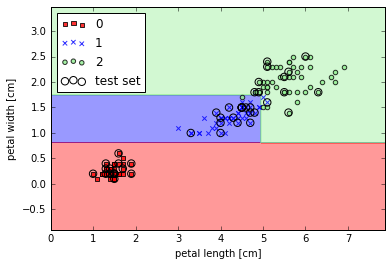

In [20]:
from sklearn.tree import DecisionTreeClassifier

X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
tree.fit(X_combined, y_combined)

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc="upper left")
plt.show()

**Random Forest Classifier**

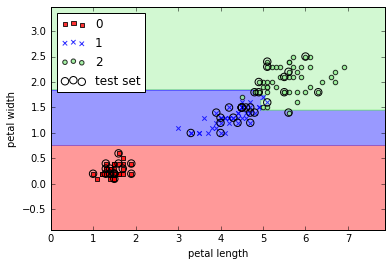

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length')

plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.show()

**K-Nearest Neighbors Classifier**

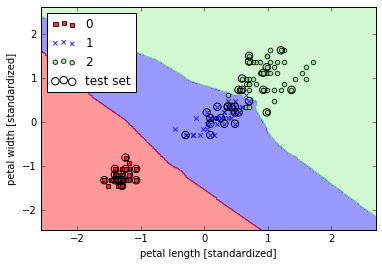

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc="upper left")
plt.show()